A prediction model for the topic of customers’ banking questions

# Importing Libraries

In [ ]:
import sklearn.model_selection
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Creating dataframe from the file uploaded in google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive')
df = pd.read_csv('/content/drive/MyDrive/OPTION2_joined_coursework_dataset_banking_final.csv')

> Printing Column and rows

In [ ]:
print(df.head())
print(df.columns)


                                                text  \
0         Can I automatically top-up when traveling?   
1  What kind of fiat currency can I used for hold...   
2  I did not get the item I ordered.  How should ...   
3                Freeze my account it's been hacked.   
4  is there a reason that my payment didnt go thr...   

                      label   query_index  
0  top_up_queries_or_issues  526cd7f17526  
1                     other  f3cf7343067e  
2                     other  9a19501c3a3c  
3     needs_troubleshooting  d76b07db8cf8  
4                     other  bd95ba09a18d  
Index(['text', 'label', 'query_index'], dtype='object')


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14195 entries, 0 to 14194
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         14195 non-null  object
 1   label        13674 non-null  object
 2   query_index  14195 non-null  object
dtypes: object(3)
memory usage: 332.8+ KB
None


> Data Visualization

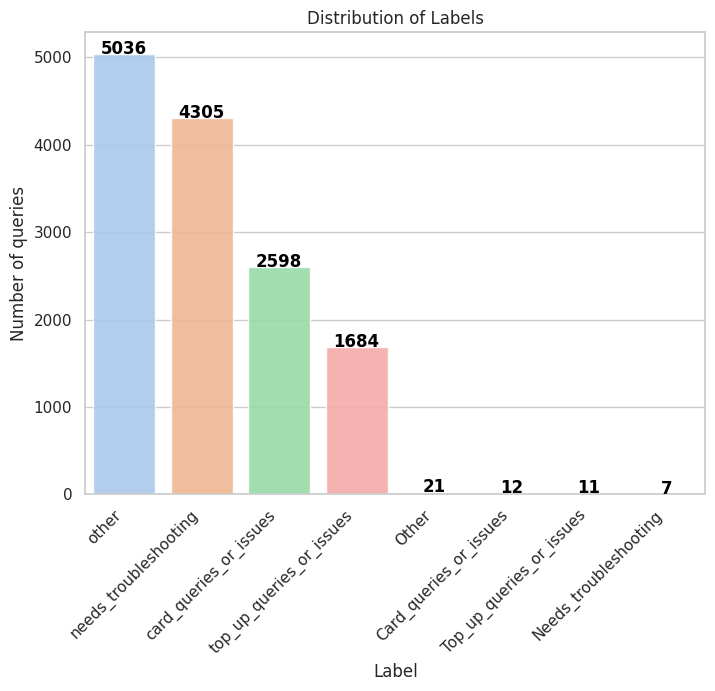

In [ ]:
# Calculate the counts of each label
label_counts = df['label'].value_counts()

# Define a color palette
colors = sns.color_palette('pastel')

# Create a bar chart showing the distribution of the 'label' column
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.9, palette=colors)
plt.title('Distribution of Labels')
plt.ylabel('Number of queries', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(label_counts.values):
    ax.text(i, v, str(v), color='black', ha='center', fontweight='bold')
plt.show()

In [ ]:
# Get the data type of the label column
label_type = df['label'].dtype

# Print the data type of the label column
print('Data type of label column:', label_type)

Data type of label column: object


In [ ]:
print(df['label'].unique())

['top_up_queries_or_issues' 'other' 'needs_troubleshooting'
 'card_queries_or_issues' nan 'Needs_troubleshooting'
 'Card_queries_or_issues' 'Other' 'Top_up_queries_or_issues']


In [ ]:
print(df['label'].value_counts())

other                       5036
needs_troubleshooting       4305
card_queries_or_issues      2598
top_up_queries_or_issues    1684
Other                         21
Card_queries_or_issues        12
Top_up_queries_or_issues      11
Needs_troubleshooting          7
Name: label, dtype: int64


In [ ]:
print(df.shape)

(14195, 3)


> Finding Missing values

In [ ]:

missing_values = df.isnull().sum()

print(missing_values)

text             0
label          521
query_index      0
dtype: int64


> Finding Duplicates

In [ ]:
# Check for duplicate values in the 'label' column
duplicates = df['label'].duplicated()

# Print the duplicate values (if any)
if duplicates.any():
    print('The following labels have duplicate values:')
    print(df['label'][duplicates])
else:
    print('No duplicate values found in the "label" column.')

The following labels have duplicate values:
2                         other
4                         other
5                         other
7                         other
8                         other
                  ...          
14190    card_queries_or_issues
14191    card_queries_or_issues
14192    card_queries_or_issues
14193     needs_troubleshooting
14194    card_queries_or_issues
Name: label, Length: 14186, dtype: object


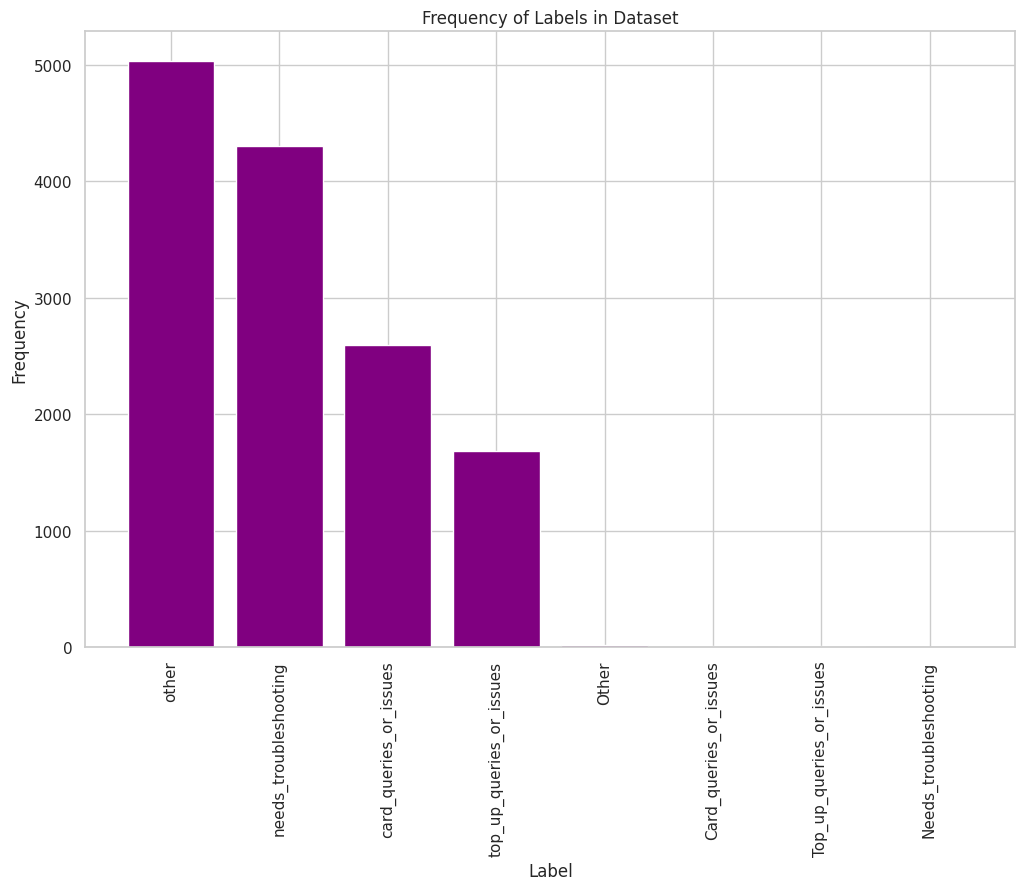

In [ ]:
# Count the frequency of each label
label_counts = df['label'].value_counts()

# Print the label counts as a chart
plt.figure(figsize=(12,8))
plt.bar(label_counts.index, label_counts.values, color='purple')
plt.xticks(rotation=90)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Frequency of Labels in Dataset')
plt.show()

**Data Preprocessing**

> Handling Missing Value

> Imputation Method

In [ ]:
most_frequent_label = df['label'].mode()[0]
df['label'].fillna(most_frequent_label, inplace=True)
print(df.isnull().sum())


text           0
label          0
query_index    0
dtype: int64


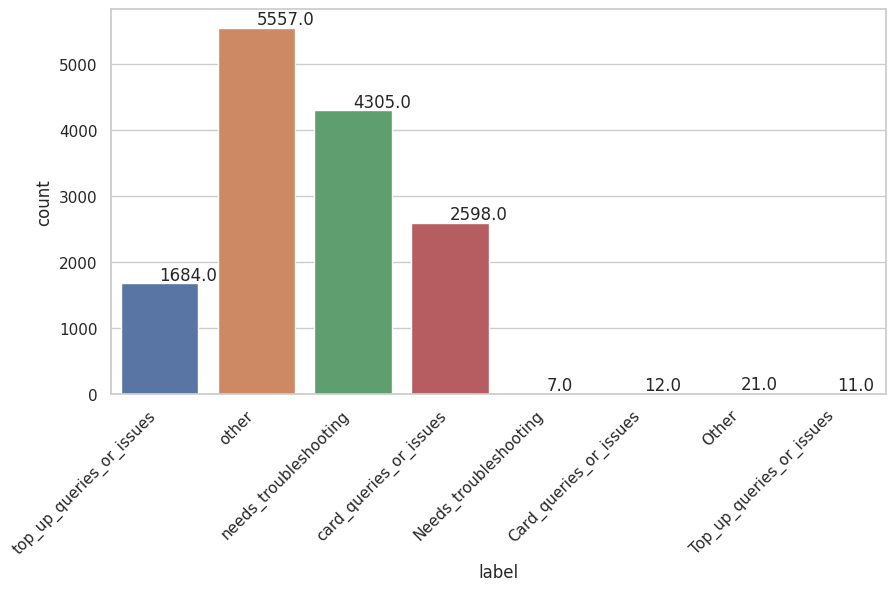

In [ ]:
plt.figure(figsize=(10,5)) # adjust the figure size
ax = sns.countplot(x="label", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.4, p.get_height()+50))
plt.show()

**Standardize the labels**

In [ ]:
# Standardize label column to lowercase
df['label'] = df['label'].str.lower()

# Print updated value counts
print(df['label'].value_counts())


other                       5578
needs_troubleshooting       4312
card_queries_or_issues      2610
top_up_queries_or_issues    1695
Name: label, dtype: int64


Text(0.5, 1.0, 'Distribution of Standardize Labels')

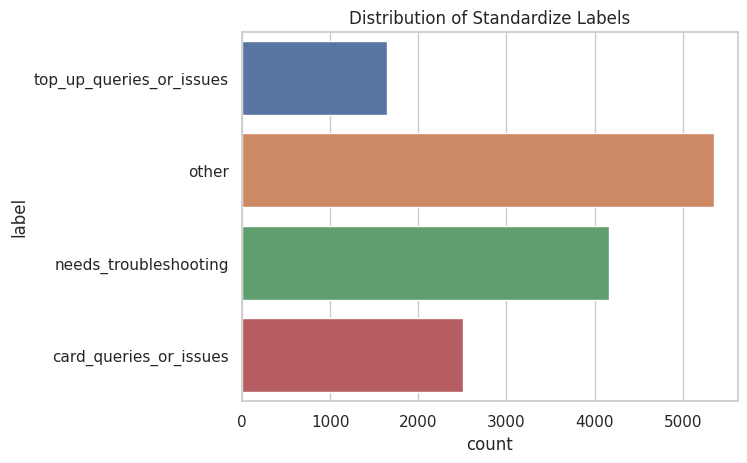

In [ ]:
sns.countplot(data=df, y='label')
plt.title('Distribution of Standardize Labels')

**Handle Duplicate**

In [ ]:
print(df['label'].unique())

['top_up_queries_or_issues' 'other' 'needs_troubleshooting'
 'card_queries_or_issues']


In [ ]:
# Check for duplicate rows based on all columns
duplicates_before = df.duplicated()

# Print the count of duplicate rows before handling
print("Count of duplicate rows before handling:", duplicates_before.sum())

# Drop duplicate rows based on all columns and keep all columns intact
df.drop_duplicates(keep='first', inplace=True)

# Check for duplicate rows again after handling
duplicates_after = df.duplicated()

# Print the count of duplicate rows after handling
print("Count of duplicate rows after handling:", duplicates_after.sum())


Count of duplicate rows before handling: 523
Count of duplicate rows after handling: 0


In [ ]:
print(df['label'].unique())

['top_up_queries_or_issues' 'other' 'needs_troubleshooting'
 'card_queries_or_issues']


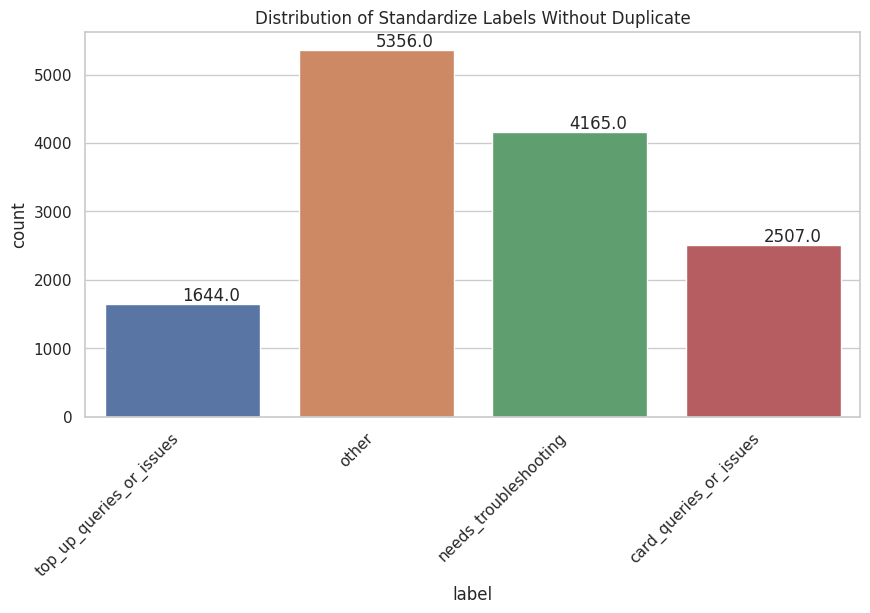

In [ ]:
plt.figure(figsize=(10,5)) # adjust the figure size
ax = sns.countplot(x="label", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.4, p.get_height()+50))
plt.title('Distribution of Standardize Labels Without Duplicate')
plt.show()


> Data Balancing Using Random Undersampling

In [ ]:
print(df['label'].value_counts().transpose())


other                       5356
needs_troubleshooting       4165
card_queries_or_issues      2507
top_up_queries_or_issues    1644
Name: label, dtype: int64


> Data Balancing

> Class Weight Balancing

In [ ]:
# from sklearn.utils.class_weight import compute_class_weight

# # Calculate the class weights
# class_weights = compute_class_weight(class_weight="balanced", classes=df["label"].unique().tolist(), y=df["label"])
# class_weights_dict = dict(zip(df["label"].unique(), class_weights))

# # Add the class weights to the original dataset
# df["class_weight"] = df["label"].map(class_weights_dict)

# # Create a new dataframe with only the balanced instances
# df_balanced = pd.DataFrame()
# for label in df["label"].unique():
#     class_weight = df[df["label"] == label]["class_weight"].iloc[0]
#     class_df = df[df["label"] == label].sample(frac=class_weight, replace=True, random_state=42)
#     df_balanced = pd.concat([df_balanced, class_df])

# # Print the balanced dataset
# print(df_balanced)


import pandas as pd
from imblearn.over_sampling import RandomOverSampler



# Splitting the dataset into features and target
X = df.drop('label', axis=1)
y = df['label']

# Creating a RandomOverSampler object
ros = RandomOverSampler(random_state=42)

# Resampling the dataset using RandomOverSampler
X_resampled, y_resampled = ros.fit_resample(X, y)

# Combining the resampled features and target into a balanced dataset
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

# Print the value counts of the target column to verify balance
print(df_balanced['label'].value_counts())


top_up_queries_or_issues    5356
other                       5356
needs_troubleshooting       5356
card_queries_or_issues      5356
Name: label, dtype: int64


In [ ]:
print(df_balanced["label"].value_counts())

top_up_queries_or_issues    5356
other                       5356
needs_troubleshooting       5356
card_queries_or_issues      5356
Name: label, dtype: int64


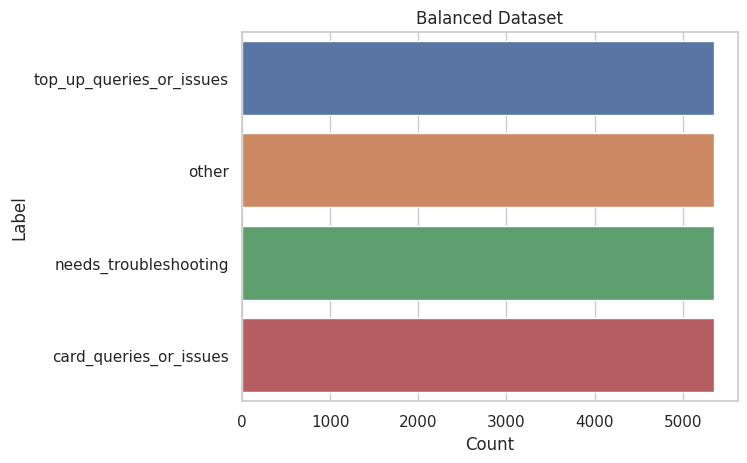

In [ ]:
# Create the plot
sns.countplot(data=df_balanced, y='label')

# Add labels and title
plt.ylabel('Label')
plt.xlabel('Count')
plt.title('Balanced Dataset')

# Show the plot
plt.show()

> Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# loop through each column in the dataframe
for col in df_balanced.columns:
    # check if the column data type is categorical
    if df_balanced[col].dtype == 'object':
        # fit the LabelEncoder to the column
        le.fit(df_balanced[col])
        # transform the column using the fitted LabelEncoder
        df_balanced[col] = le.transform(df_balanced[col])

# display the updated dataframe
print(df_balanced)


        text  query_index  label
0        401         4435      3
1      10310        13050      2
2       3934         8195      2
3       1714        11555      1
4      12736        10159      2
...      ...          ...    ...
21419    731        11739      3
21420  12451         8879      3
21421  12220         7681      3
21422   5660         7356      3
21423   4392         4351      3

[21424 rows x 3 columns]


In [ ]:
print(df_balanced.dtypes)

text           int64
query_index    int64
label          int64
dtype: object


In [ ]:
df_balanced = df_balanced.astype('int64')


In [ ]:
print(df_balanced.dtypes)

text           int64
query_index    int64
label          int64
dtype: object


In [ ]:
print(df_balanced.dtypes)

text           int64
query_index    int64
label          int64
dtype: object


In [ ]:

print(df_balanced.columns)

# Check if the last column is the target column
if df_balanced.columns[-1] == 'label':
    print("The last column is the target column.")
else:
    print("The last column is not the target column.")


Index(['text', 'query_index', 'label'], dtype='object')
The last column is the target column.


In [ ]:
df_balanced.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21424 entries, 0 to 21423
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   text         21424 non-null  int64
 1   query_index  21424 non-null  int64
 2   label        21424 non-null  int64
dtypes: int64(3)
memory usage: 502.2 KB


> Converting Label to numpy array

In [ ]:

np_array = df_balanced.values
print(type(np_array))

<class 'numpy.ndarray'>


In [ ]:
df_balanced = np_array

In [ ]:
print(df_balanced.shape)
print(df_balanced.dtype)

(21424, 3)
int64


> Data Scaled

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

X = df_balanced[:, :-1] # Selecting all columns except the target column
y = df_balanced[:, -1] # Selecting the target column

# Scaling the feature data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Combining the scaled feature data with the target column
df_balanced_scaled = np.column_stack((X_scaled, y))


**Spliting the dataset**

In [ ]:
from sklearn.model_selection import train_test_split


X = df_balanced_scaled[:, :-1] # Selecting all columns except the target column
y = df_balanced_scaled[:, -1] # Selecting the target column

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shape of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (17139, 2)
Shape of y_train: (17139,)
Shape of X_test: (4285, 2)
Shape of y_test: (4285,)


> **Build Model**

> Neural Network

In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(2,), activation='relu'))
model.add(Dense(8, activation='relu'))


# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10)

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
1714/1714 [==============================] - 4s 2ms/step - loss: 2.9260 - accuracy: 0.0519
Epoch 2/150
1714/1714 [==============================] - 3s 2ms/step - loss: -1.3582 - accuracy: 0.0848
Epoch 3/150
1714/1714 [==============================] - 3s 2ms/step - loss: -2.4971 - accuracy: 0.0753
Epoch 4/150
1714/1714 [==============================] - 3s 2ms/step - loss: -3.2806 - accuracy: 0.0689
Epoch 5/150
1714/1714 [==============================] - 4s 2ms/step - loss: -3.7556 - accuracy: 0.0684
Epoch 6/150
1714/1714 [==============================] - 3s 2ms/step - loss: -3.7989 - accuracy: 0.0684
Epoch 7/150
1714/1714 [==============================] - 3s 2ms/step - loss: -3.7990 - accuracy: 0.0684
Epoch 8/150
1714/1714 [==============================] - 3s 2ms/step - loss: -3.7990 - accuracy: 0.0684
Epoch 9/150
1714/1714 [==============================] - 3s 2ms/step - loss: -3.7990 - accuracy: 0.0684
Epoch 10/150
1714/1714 [==============================] - 4s 2ms/

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense

# # Creating the model
# model = Sequential()
# model.add(Dense(12, input_dim=2, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# # Compiling the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Fitting the model
# model.fit(X_train, y_train, epochs=150, batch_size=10)

# # Evaluating the model on test data
# _, accuracy = model.evaluate(X_test, y_test)
# print('Test accuracy:', accuracy)


> Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Creating the random forest model
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Predicting the test set labels
y_pred = model.predict(X_test)

# Calculating the test set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)


Test accuracy: 0.5075845974329055


> After Tunning

In [ ]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)    

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)
# Calculating the test set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)


Test accuracy: 0.7262543757292882


In [ ]:
!pip install https://github.com/scikit-learn/scikit-learn/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/scikit-learn/scikit-learn/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


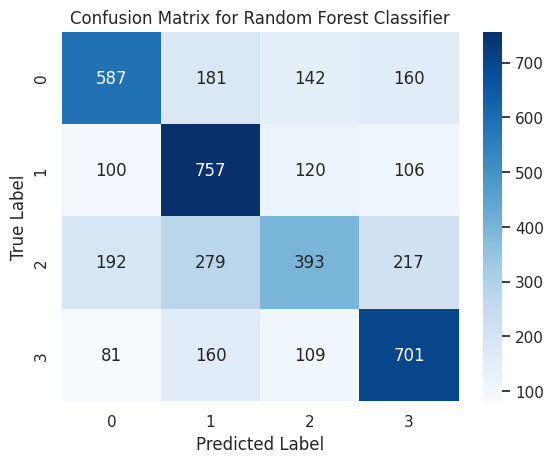

In [ ]:
# generate the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
# plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

> Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score

# Predicting the training set labels
y_train_pred = model.predict(X_train)

# Calculating the training set accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print('Training accuracy:', train_accuracy)

# Predicting the test set labels
y_test_pred = model.predict(X_test)

# Calculating the test set accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Test accuracy:', test_accuracy)


Training accuracy: 0.5433805939669759
Test accuracy: 0.468144690781797


> After Tunning

In [ ]:
# Load libraries

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7626604434072345


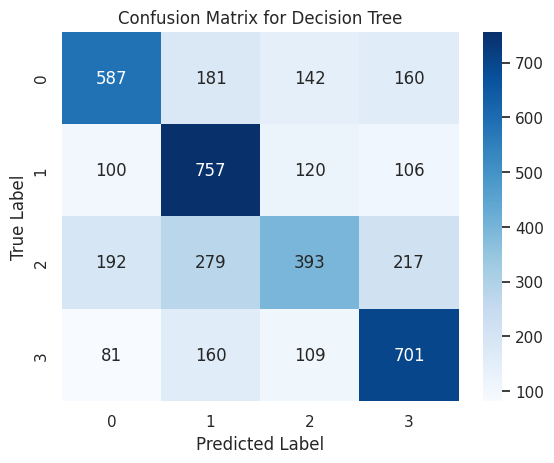

In [ ]:
# generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

> SVM

In [ ]:
from sklearn import svm, datasets

from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [ ]:
# Calculating the test set accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Test accuracy:', test_accuracy)

Test accuracy: 0.468144690781797


> Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Creating the Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Predicting the test set labels
y_pred = model.predict(X_test)

# Calculating the test set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)


Test accuracy: 0.5689614935822637


> > KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Creating the KNN model with k=5
model = KNeighborsClassifier(n_neighbors=5)

# Training the model
model.fit(X_train, y_train)

# Predicting the test set labels
y_pred = model.predict(X_test)

# Calculating the test set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)


Test accuracy: 0.494049008168028


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define KNN model
knn_model = KNeighborsClassifier()

# Define hyperparameters for grid search
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}

# Grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Train the model using the best hyperparameters
knn_model = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                                  weights=grid_search.best_params_['weights'],
                                  algorithm=grid_search.best_params_['algorithm'])
knn_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f927a524d30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.9/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.9/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0: cannot open shared object file: No such file or directory


Best hyperparameters: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
Test accuracy: 0.6840140023337223


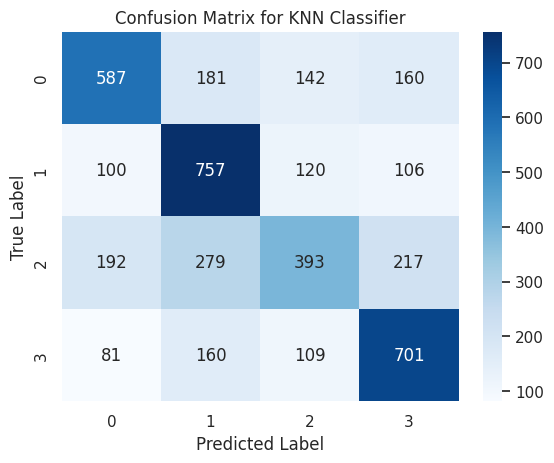

In [ ]:
# generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

plt.title("Confusion Matrix for KNN Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

> PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# create PCA model with n_components=2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# create a random forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# train the random forest model on the PCA-transformed data
rf_model.fit(X_train_pca, y_train)

# make predictions on the test set using the trained model
y_pred = rf_model.predict(X_test_pca)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)

Test accuracy: 0.48588098016336057


> Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Creating the Gradient Boosting Classifier model
model = GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Predicting the test set labels
y_pred = model.predict(X_test)

# Calculating the test set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)


Test accuracy: 0.5689614935822637
